In [1]:
#!pip instal mlflow

# Importing Libraries

In [2]:
import mlflow
import os

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [3]:
mlflow.set_experiment("loan_status") # We're creating some kind of folder, where we will track all the metrics/parameters we're interested in.

mlflow.set_tag('mlflow.runName', 'loan_status run5') # This is a tag, which is like a label. It helps us to identify the run.

# three famous api
#1. log_param
#2. log_metric
#3. log_artifact, files like model pkl file, or confusion-matrix jpg file, any data small dataset. Limit of 5GB. 


#mlflow.set_tag("experiment_name", "My Experiment")
#mlflow.set_tag("idea", "Blame rebecca if this doesn't work well. ")
#mlflow.set_tag("source_name", "train.py")
#mlflow.set_tag("source_version", "1.0.0")
#mlflow.set_tag("user", "john_doe")
#mlflow.set_tag("environment", "development")
#mlflow.set_tag("git_commit", "abc123")
#mlflow.set_tag("notebook_path", "notebooks/train.ipynb")
#mlflow.set_tag("tags", "tag1,tag2,tag3")

# Importing Dataset

In [4]:
train_df = pd.read_csv('data.csv')
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
# let's binary encode, Gender, Married Loan_Status

train_df['Gender'] = train_df['Gender'].map({'Male': 0, 'Female': 1})
train_df['Married'] = train_df['Married'].map({'No': 0, 'Yes': 1})
train_df['Loan_Status'] = train_df['Loan_Status'].map({'N': 0, 'Y': 1})

In [6]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    float64
 2   Married            611 non-null    float64
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 62.5+ KB


In [7]:
train_df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
## dropping all the missing values
train_df = train_df.dropna()
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Let's create Features

In [9]:
feature_columns = ['Gender', 'Married', 'ApplicantIncome', 'LoanAmount', 'Credit_History']
X = train_df[feature_columns]
y = train_df.Loan_Status


mlflow.log_param("feature_columns", feature_columns)


X.shape, y.shape

((480, 5), (480,))

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=5)


## Model Training

In [11]:
from sklearn.ensemble import RandomForestClassifier

depth = 3

mlflow.log_param("max_depth", depth)


model = RandomForestClassifier(max_depth=depth, random_state=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=5)

In [12]:
from sklearn.metrics import accuracy_score

pred_val = model.predict(X_val)
val_acc_score = accuracy_score(y_val, pred_val)

mlflow.log_metric("val_accuracy", val_acc_score)

print(f"Validation accuracy score: {val_acc_score}")

Validation accuracy score: 0.7916666666666666


In [13]:
pred_train = model.predict(X_train)
train_acc = accuracy_score(y_train, pred_train)

mlflow.log_metric("train_accuracy", train_acc)

print(f"Train accuracy: {train_acc}")

Train accuracy: 0.8255208333333334


In [14]:
# in deep learning, we compare/observe how the gradients are changing, and how the loss is changing.
# the ratio of weights to gradients. 

# tensorboard....

In [15]:
mlflow.end_run()

# Some other Efficient ways (perhaps) of using MLFLOW

In [16]:

with mlflow.start_run():
	# train a random forest model

    max_depth = 7
    model = RandomForestClassifier(max_depth=max_depth, random_state=42)

    model.fit(X_train, y_train)

    mlflow.log_param("max_depth", max_depth)

    mlflow.log_param("feature_columns", feature_columns)

    from sklearn.metrics import accuracy_score

    pred_val = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, pred_val)

    mlflow.log_metric("val_accuracy", val_accuracy)

    pred_train = model.predict(X_train)
    train_acc = accuracy_score(y_train, pred_train)

    mlflow.log_metric("train_accuracy", train_acc)

    mlflow.sklearn.log_model(model, "randomforest-model")

    mlflow.log_artifact("data.csv") # limit of 5GB by default
    
	#mlflow.log_artifact(xgboost_model)

2025/04/28 21:48:04 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


# Another Another way of using MLFLOW

In [17]:
def mlflow_runs(n_est,max_dep,i):
    with mlflow.start_run():

        model_rf = RandomForestClassifier(n_estimators=n_est, max_depth=max_dep, random_state=5)
        model_rf.fit(X_train, y_train)

        pred_val = model_rf.predict(X_val)
        val_acc=accuracy_score(y_val, pred_val)

        pred_train = model_rf.predict(X_train)
        train_acc=accuracy_score(y_train, pred_train)

        run="hyperparameter_run_"+str(i)
        mlflow.set_tag('mlflow.runName',run)
        mlflow.log_param('n_estimators',n_est)
        mlflow.log_param('max_depth',max_dep)
        mlflow.log_metric('val_acc',val_acc)
        mlflow.log_metric('train_acc',train_acc)
        mlflow.set_tag('data file','data_new.csv')

        mlflow.sklearn.log_model(model_rf, "model")
        

mlflow_runs(10,2,1)
mlflow_runs(20,2,2)
mlflow_runs(40,2,3)
mlflow_runs(10,4,4)
mlflow_runs(20,4,5)
mlflow_runs(40,4,6)
mlflow_runs(10,8,7)
mlflow_runs(20,8,8)
mlflow_runs(40,8,9)

/Users/shivam13juna/Documents/virtual_envs/appy/lib/python3.9/site-packages/_distutils_hack/__init__.py:15: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/shivam13juna/Documents/virtual_envs/appy/lib/python3.9/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(
2025/04/28 21:50:19 WARNING mlflow.models.model: Input example should be provided to infer 

# Let's try using KNN

/Users/shivam13juna/Documents/virtual_envs/appy/lib/python3.9/site-packages/_distutils_hack/__init__.py:15: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/Users/shivam13juna/Documents/virtual_envs/appy/lib/python3.9/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(
2025/04/28 21:53:12 WARNING mlflow.models.model: Input example should be provided to infer 

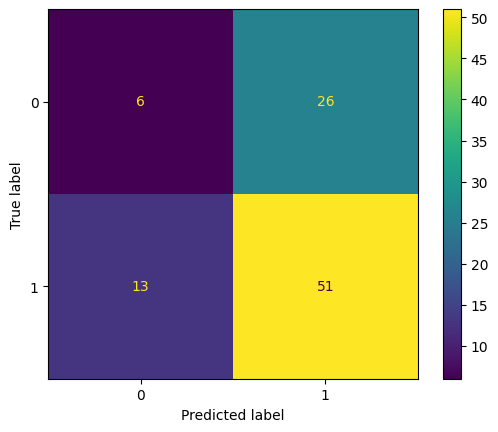

In [18]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


with mlflow.start_run():
    knn_model= KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)

    pred_val = knn_model.predict(X_val)
    val_acc=accuracy_score(y_val, pred_val)

    pred_train = knn_model.predict(X_train)
    train_acc=accuracy_score(y_train, pred_train)

    run="KNN"
    mlflow.set_tag('mlflow.runName',run)
    mlflow.log_param('neighbors',5)
    mlflow.log_metric('val_acc',val_acc)
    mlflow.log_metric('train_acc',train_acc)
    mlflow.set_tag('data file','data_new.csv')

    cm=ConfusionMatrixDisplay.from_predictions( y_val,pred_val)
    cm.figure_.savefig('confusion_mat.png')
    mlflow.log_artifact('confusion_mat.png')

    mlflow.sklearn.log_model(knn_model, "model")